In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download data
stock_symbol = "MSFT"  
data = yf.download(tickers=stock_symbol, interval="5m", period="5d")

# Verify data
if data.empty:
    raise ValueError("Failed to retrieve data. Check symbol or API limits.")


[*********************100%***********************]  1 of 1 completed


In [12]:

data = data.ffill()

# Identify and handle outliers (using Z-score)
data['Z_Close'] = (data['Close'] - data['Close'].mean()) / data['Close'].std()
data = data[data['Z_Close'].abs() <= 3]  # Filter out extreme outliers
data.drop(columns=['Z_Close'], inplace=True)

# Reset index for consistency
data.reset_index(inplace=True)


In [13]:
# Rolling Volatility
data['Rolling_Volatility'] = data['Close'].rolling(window=20).std()

# VWAP
data['VWAP'] = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()

# Moving Averages
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Statistical Measures
std_dev = data['Close'].std()
skewness = data['Close'].skew()


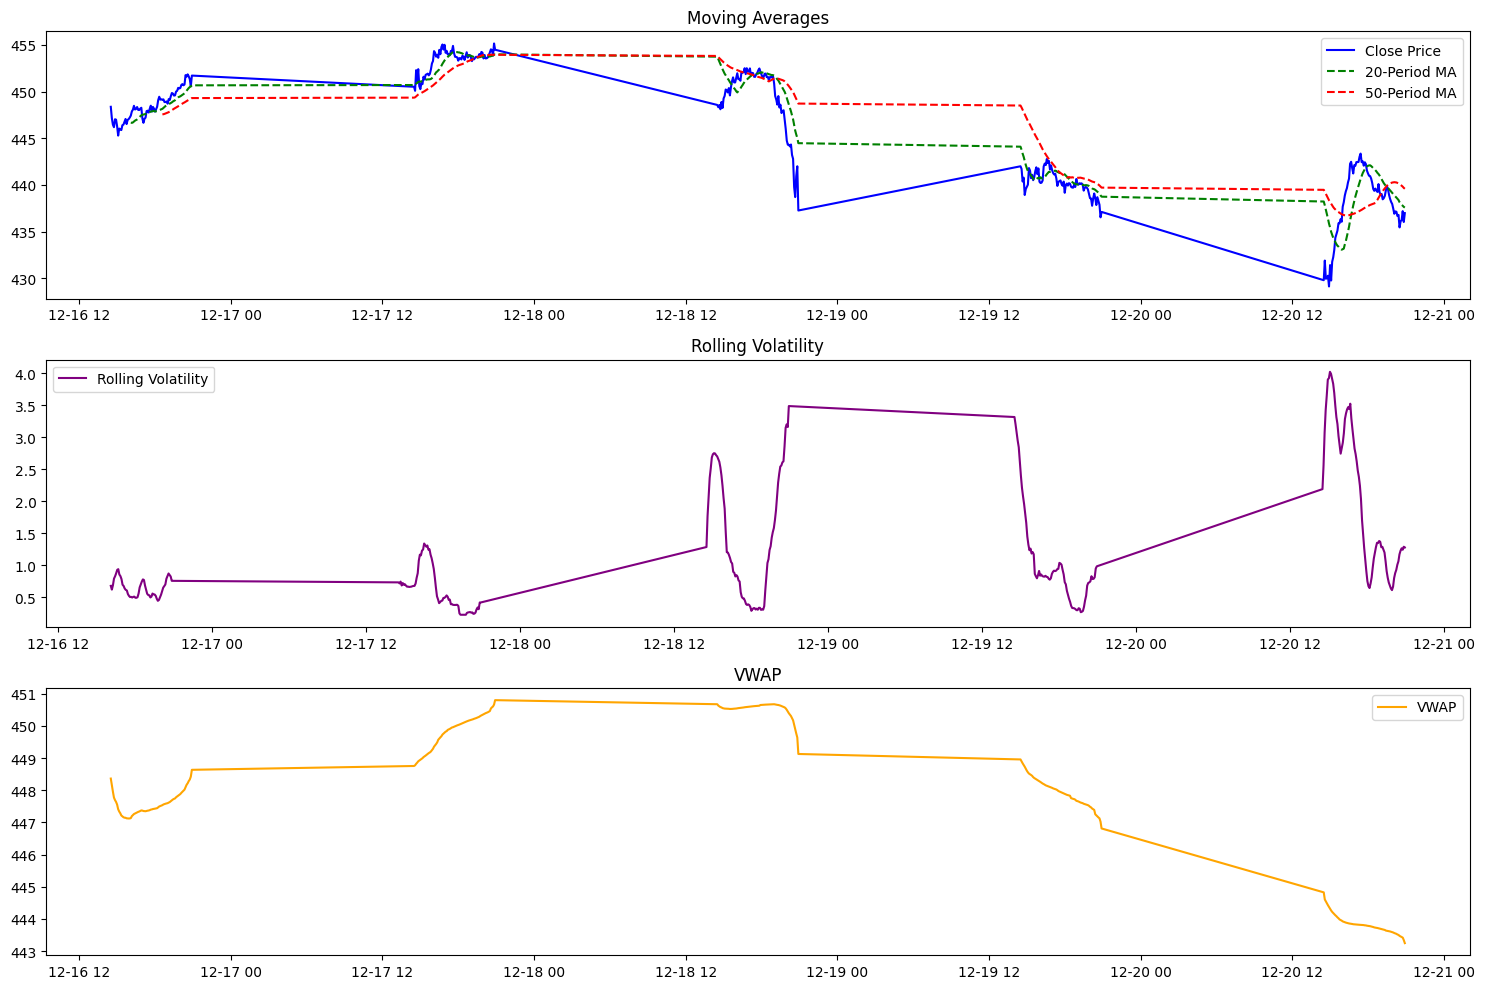

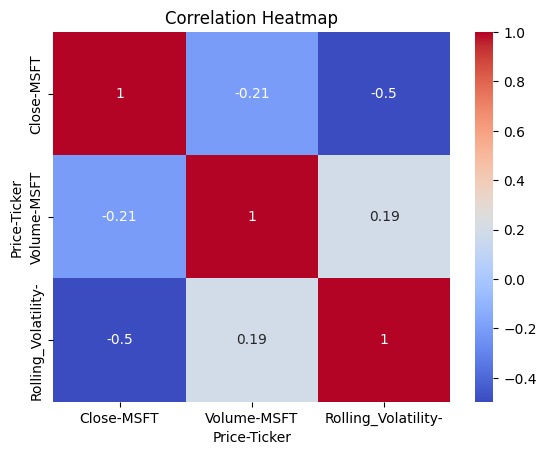

In [14]:
plt.figure(figsize=(15, 10))

# Plot Moving Averages
plt.subplot(3, 1, 1)
plt.plot(data['Datetime'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Datetime'], data['MA_20'], label='20-Period MA', color='green', linestyle='--')
plt.plot(data['Datetime'], data['MA_50'], label='50-Period MA', color='red', linestyle='--')
plt.title('Moving Averages')
plt.legend()

# Plot Rolling Volatility
plt.subplot(3, 1, 2)
plt.plot(data['Datetime'], data['Rolling_Volatility'], label='Rolling Volatility', color='purple')
plt.title('Rolling Volatility')
plt.legend()

# Plot VWAP
plt.subplot(3, 1, 3)
plt.plot(data['Datetime'], data['VWAP'], label='VWAP', color='orange')
plt.title('VWAP')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation Heatmap
sns.heatmap(data[['Close', 'Volume', 'Rolling_Volatility']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
